In [1]:
import pandas as pd
df = pd.read_csv('Downloads/Unemployment_Rate_upto_11_2020.csv')
df.head()




,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [2]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [3]:
df.columns = df.columns.str.strip()

df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     267 non-null    object        
 1   Date                       267 non-null    datetime64[ns]
 2   Frequency                  267 non-null    object        
 3   Unemployment_Rate          267 non-null    float64       
 4   Employed                   267 non-null    int64         
 5   Labour_Participation_Rate  267 non-null    float64       
 6   Region.1                   267 non-null    object        
 7   longitude                  267 non-null    float64       
 8   latitude                   267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


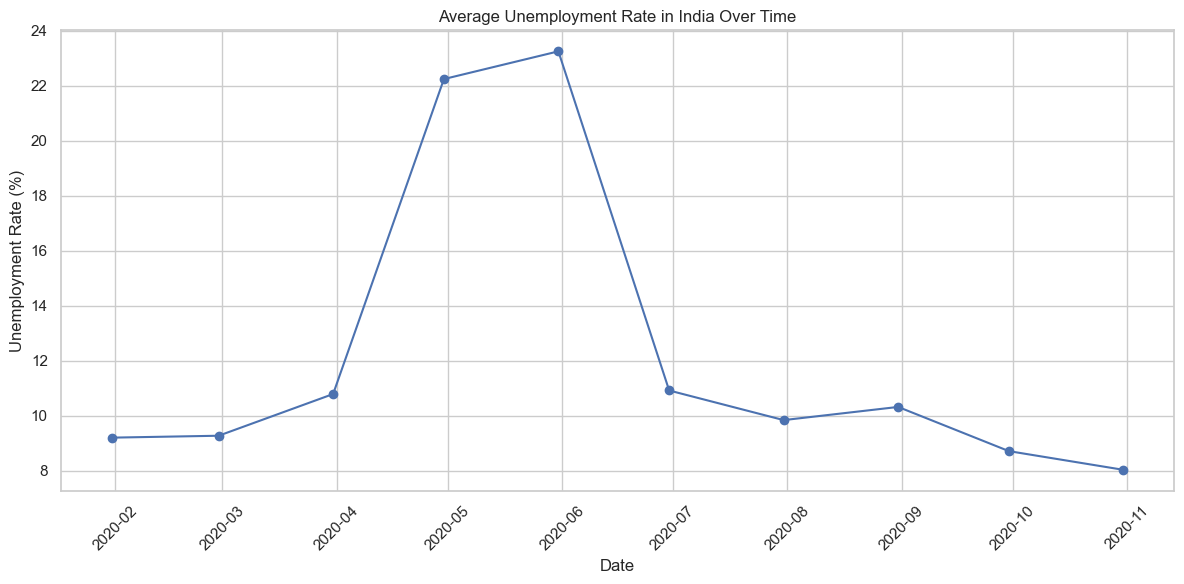

In [5]:
unemployment_trend = df.groupby('Date')['Unemployment_Rate'].mean()

plt.plot(unemployment_trend.index, unemployment_trend.values, marker='o', linestyle='-')
plt.title('Average Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
print(df.columns.tolist())



['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude']


In [10]:
df.rename(columns={
    'Region.1': 'Zone'
}, inplace=True)


In [11]:
print(df.columns.tolist())


['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Zone', 'longitude', 'latitude']


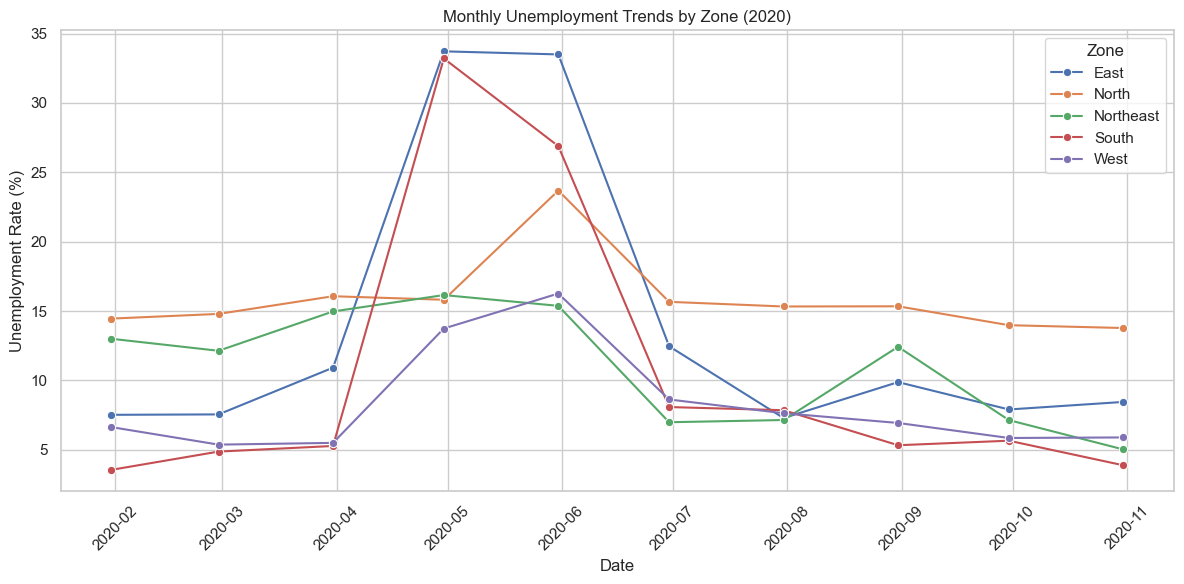

In [12]:
zone_trend = df.groupby(['Date', 'Zone'])['Unemployment_Rate'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=zone_trend, x='Date', y='Unemployment_Rate', hue='Zone', marker='o')
plt.title('Monthly Unemployment Trends by Zone (2020)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


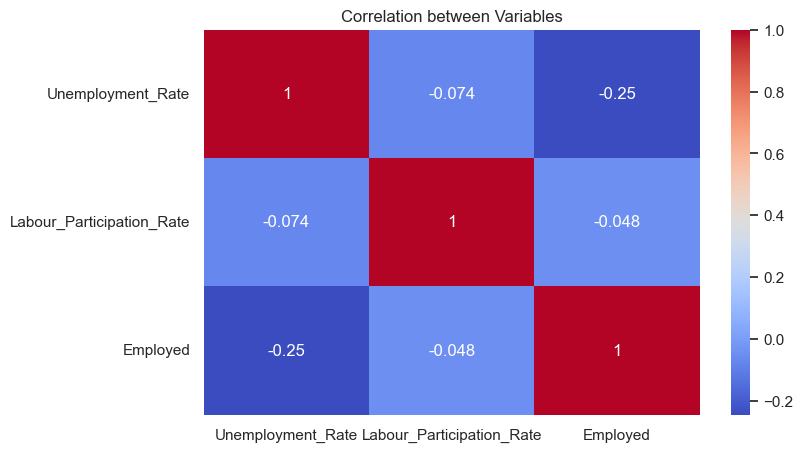

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df[['Unemployment_Rate', 'Labour_Participation_Rate', 'Employed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Variables')
plt.show()


In [14]:
state_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

print("Top 5 Highest Unemployment States:\n", state_avg.head())
print("\nTop 5 Lowest Unemployment States:\n", state_avg.tail())


Top 5 Highest Unemployment States:
 Region
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: Unemployment_Rate, dtype: float64

Top 5 Lowest Unemployment States:
 Region
Telangana    6.833
Odisha       6.462
Gujarat      6.376
Assam        4.856
Meghalaya    3.866
Name: Unemployment_Rate, dtype: float64


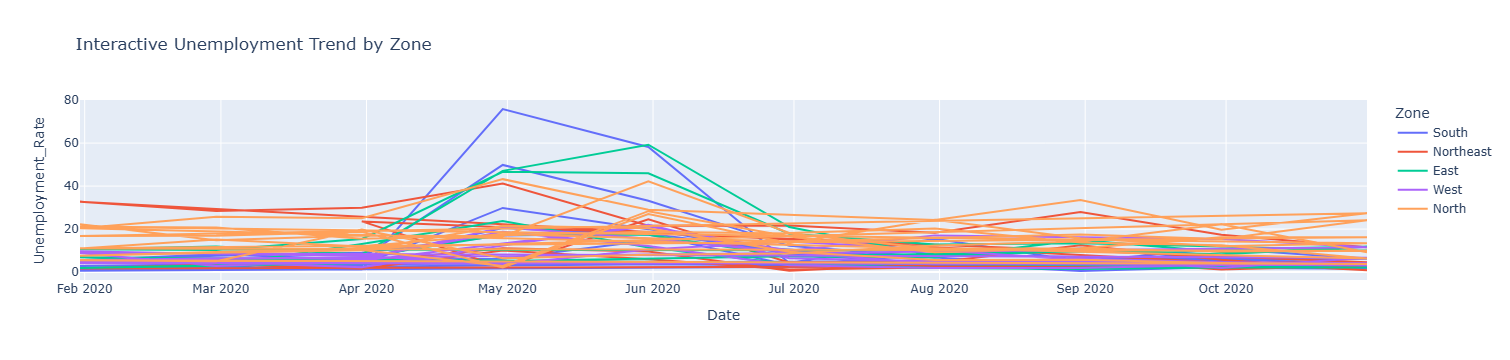

In [15]:
import plotly.express as px

fig = px.line(df, x='Date', y='Unemployment_Rate', color='Zone', title='Interactive Unemployment Trend by Zone')
fig.show()


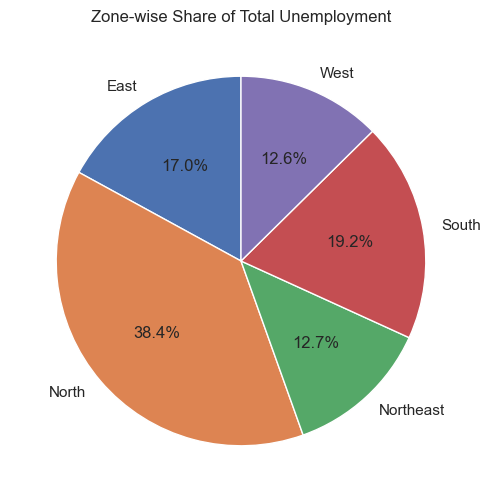

In [16]:
zone_unemp_total = df.groupby('Zone')['Unemployment_Rate'].sum()
zone_unemp_total.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Zone-wise Share of Total Unemployment')
plt.ylabel('')
plt.show()


 Key Takeaways from the Analysis
  The **North Zone** had the highest average unemployment rate across 2020, standing out as the most affected region.
  There was a sharp **unemployment spike in April and May 2020**, aligning with the nationwide lockdown during the early phase of the COVID-19 pandemic.
  **Southern and Western zones** managed to recover more quickly post-lockdown, suggesting stronger economic resilience or better job recovery mechanisms.
  A noticeable **relationship emerged between unemployment and labor force participation**, indicating that joblessness also influenced how actively people were seeking work.
  The **Northeast region** experienced relatively stable unemployment trends throughout the year.

Overall, this analysis shows how unemployment patterns varied not just over time, but also significantly between regions. These differences could be useful for designing more targeted employment or relief policies in future crises.
